<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/artificial-intelligence_training_courses/blob/master/YOLO/YOLO_proj2_personal_protective_equipments/YOLO_personal_protective_equipments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Required Libraries

In [ ]:
import os
import glob #glob is used to return all file paths that match a specific pattern.
from IPython.display import Image, display
# To clear output in the notebook use clear_output function
#display.clear_output()

In [ ]:
#check GPU or not
!nvidia-smi
HOME = os.getcwd()

Fri Jan 10 13:19:27 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.0

In [ ]:
#Checking whether YOLOv8 is Installed and its working Fine
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd datasets

/content/datasets


In [ ]:
#download data from roboflow website
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w4K80EKY5nemBt4RQkEY")
project = rf.workspace("yoloprojects-3zzqw").project("ppe-wlllw-93fkx")
version = project.version(1)
dataset = version.download("yolov8")


In [ ]:
%cd {dataset.location}

/content/datasets/ppe-1


In [ ]:
%cd {HOME}

/content


In [ ]:
import os
os.environ['HYDRA_FULL_ERROR'] = '1'

## train

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/ppe-1/data.yaml epochs=50 imgsz=320

Streaming output truncated to the last 5000 lines.
      21/50      2.36G       1.31     0.2923      1.308        172        320:  53% 42/79 [00:09<00:09,  3.95it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      21/50      2.36G      1.311     0.2921       1.31        143        320:  54% 43/79 [00:09<00:09,  3.80it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      21/50      2.36G      1.311     0.2939      1.315         83        320:  56% 44/79 [00:10<00:09,  3.83it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autoca

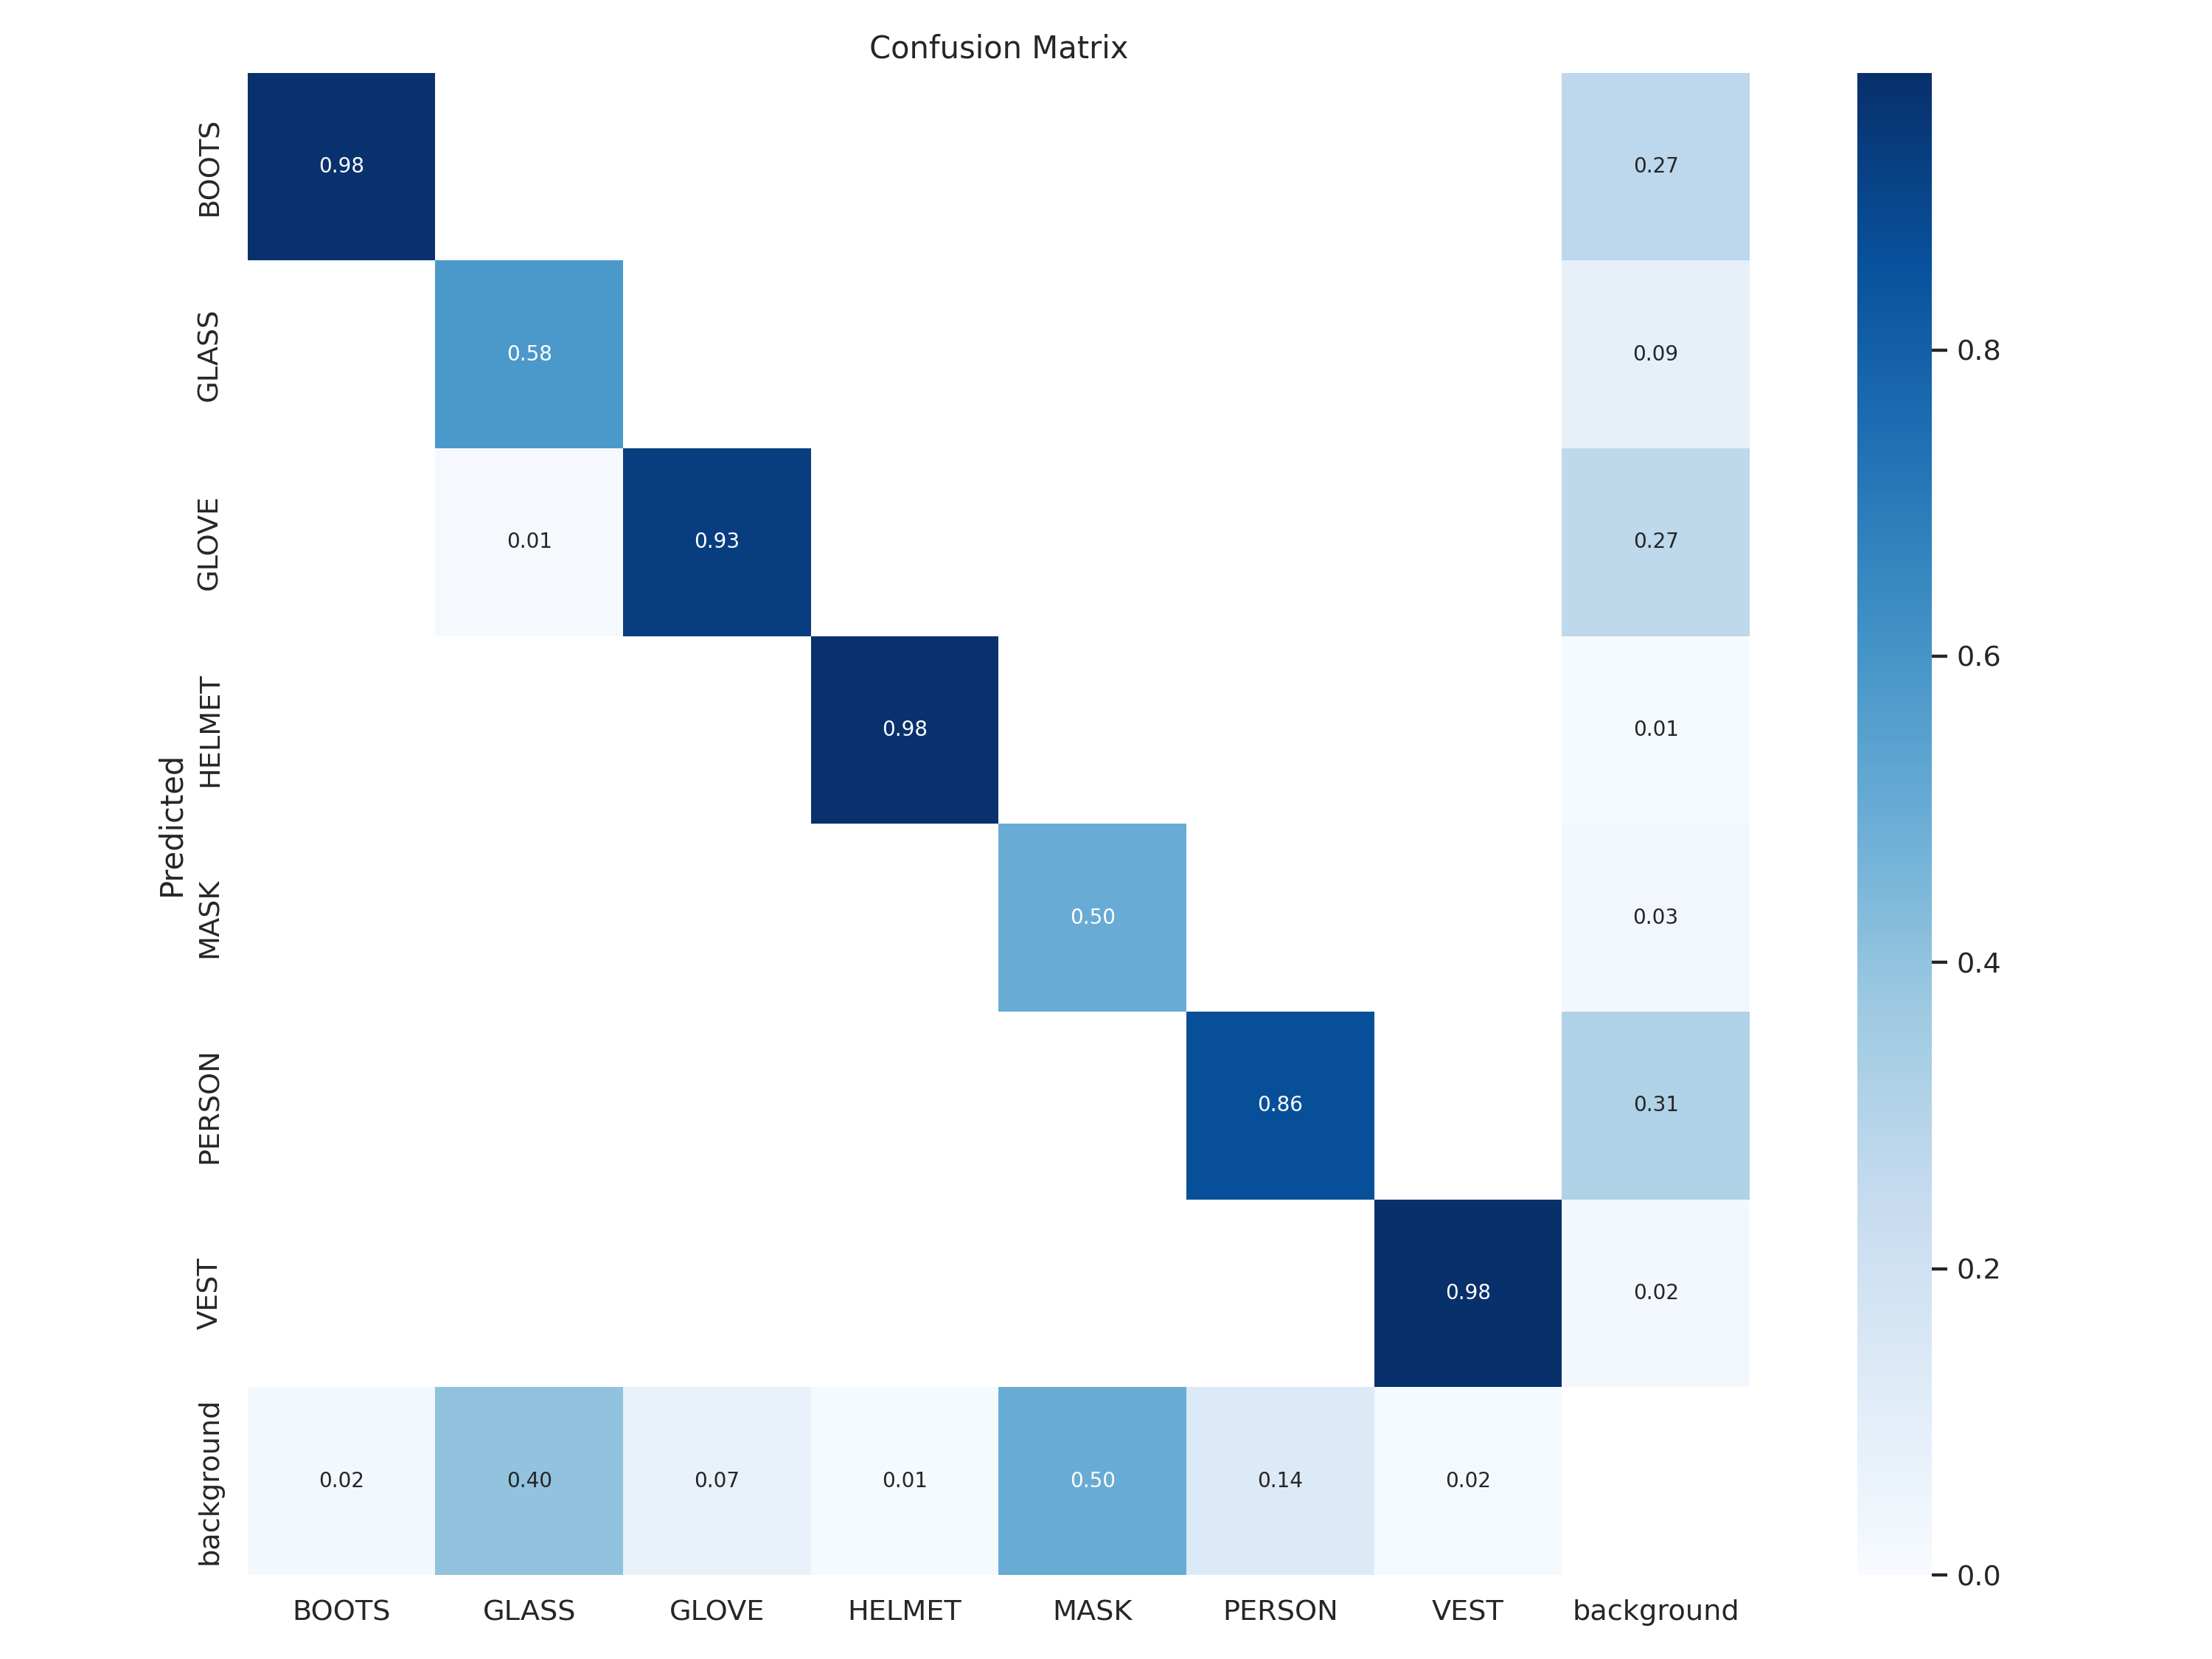

In [ ]:
Image(filename='/content/runs/detect/train4/confusion_matrix.png', width=900)

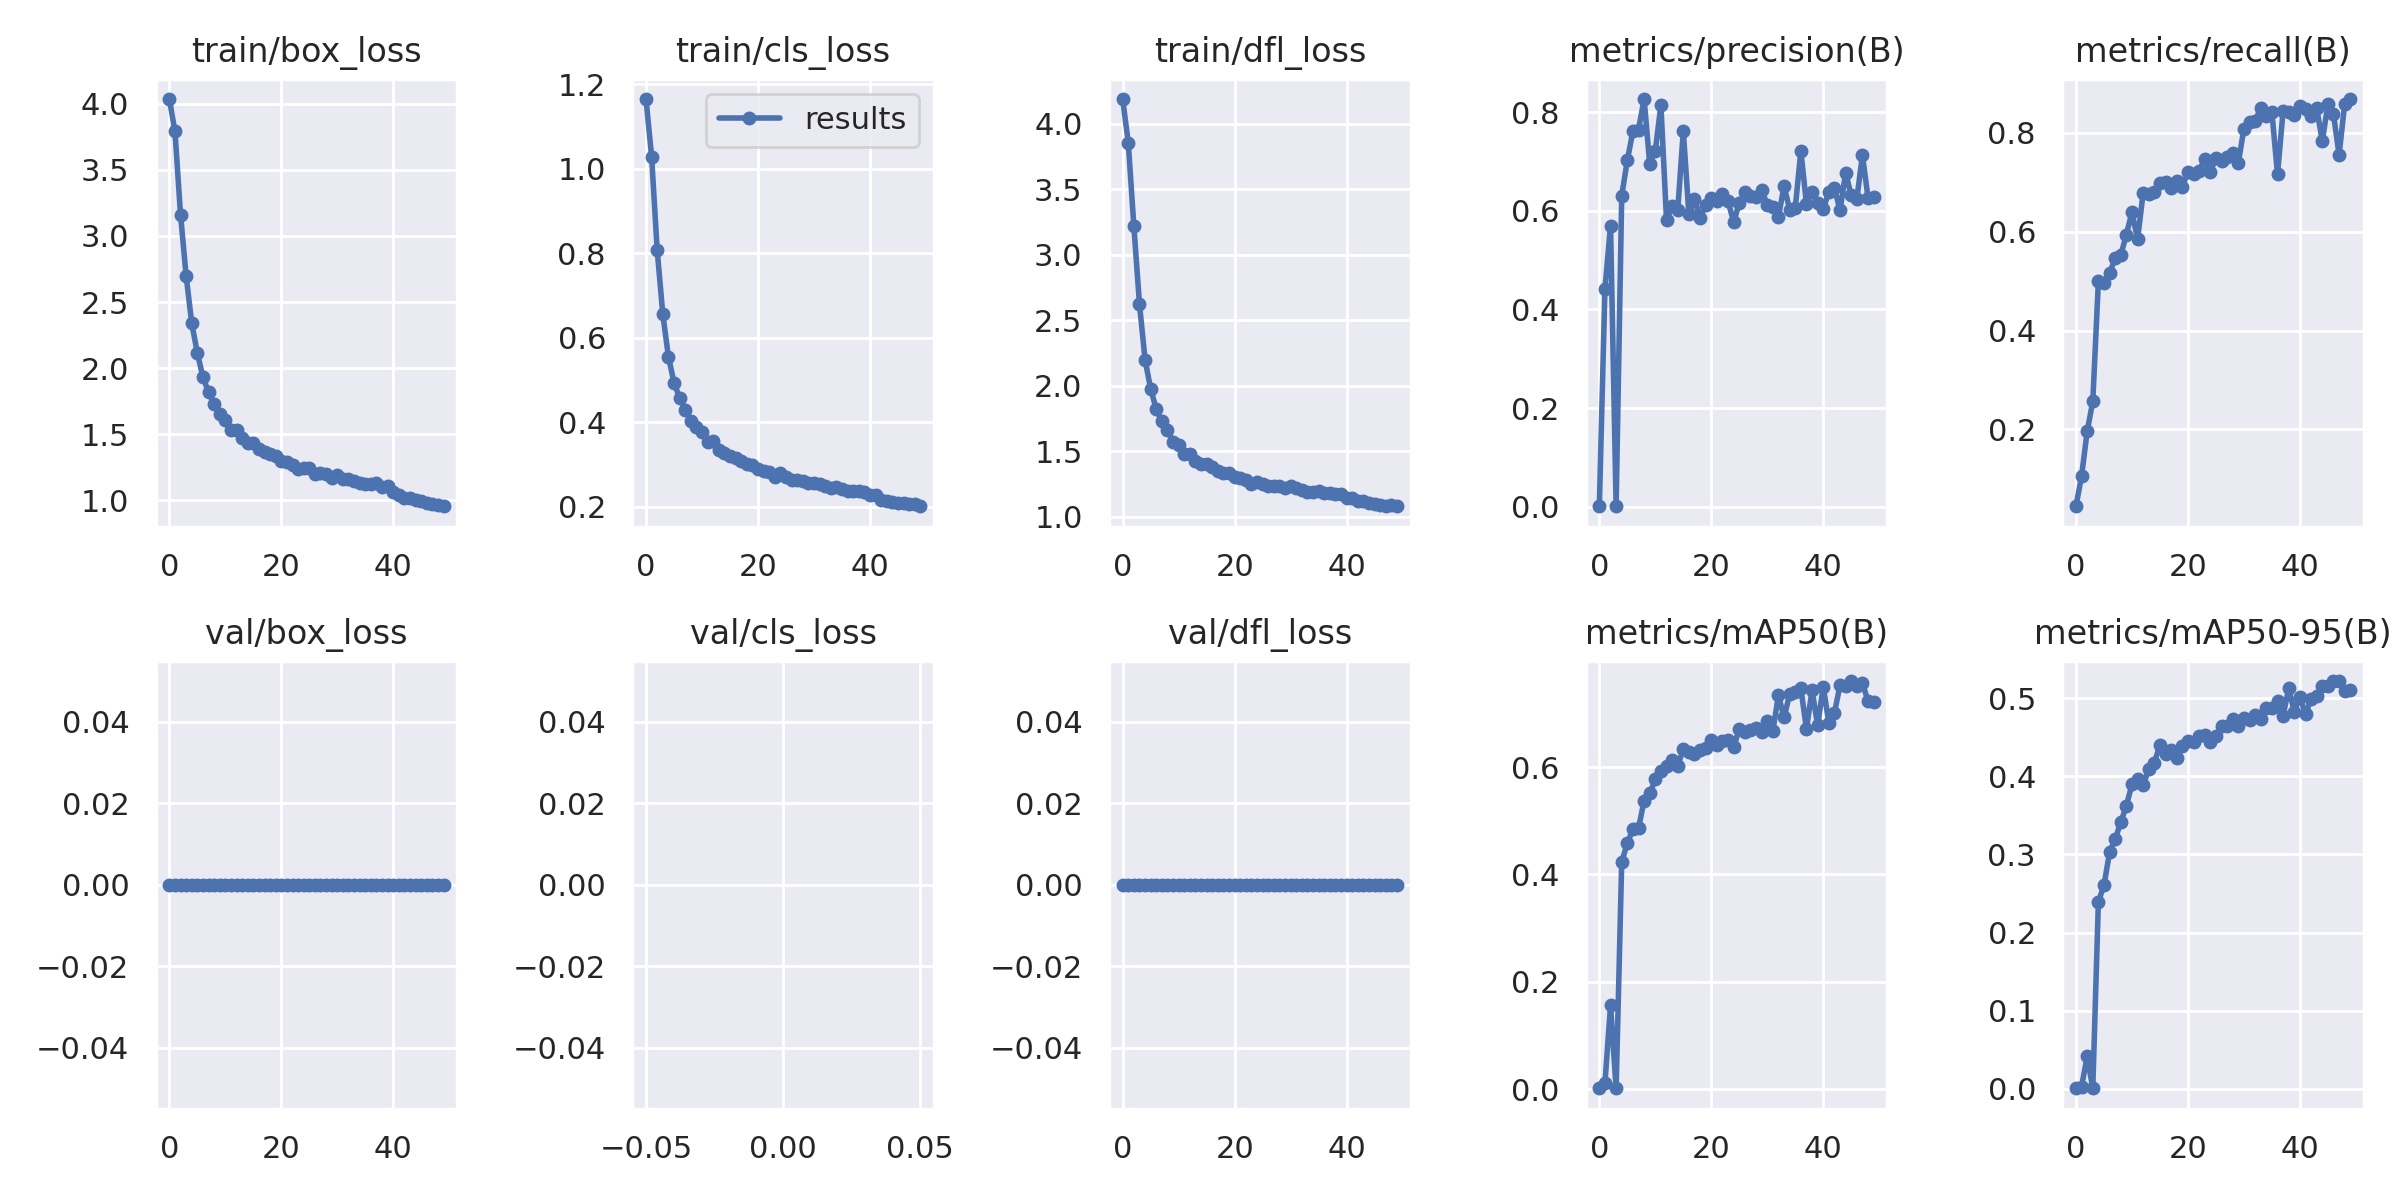

In [ ]:
Image(filename='/content/runs/detect/train4/results.png', width=900)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/datasets/ppe-1/data.yaml

2025-01-10 14:55:25.476457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 14:55:25.499900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 14:55:25.505838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 14:55:25.520183: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 14:55:26.735782: W tensorflow/comp

In [ ]:
/content/runs/detect/predict5/00035_jpg.rf.bcec86d9910bac0ee5b719eb85f302ef.jpg

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.4 source='/content/runs/detect/predict3/00035_jpg.rf.bcec86d9910bac0ee5b719eb85f302ef.jpg'

2025-01-10 15:04:06.741023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 15:04:06.772990: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 15:04:06.783603: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 15:04:06.803374: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 15:04:08.528147: W tensorflow/comp

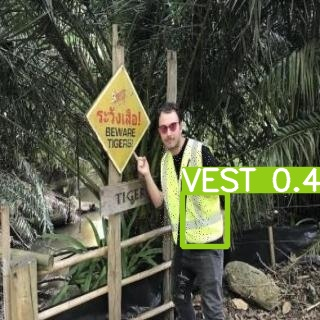

In [ ]:
Image(filename='/content/runs/detect/predict5/00035_jpg.rf.bcec86d9910bac0ee5b719eb85f302ef.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.4 source='/content/datasets/ppe-1/test/images/20220721_162553_jpg.rf.b142100750220a4b3976ca3dfacaac28.jpg'

2025-01-10 15:08:54.256067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 15:08:54.275568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 15:08:54.282296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 15:08:54.302691: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 15:08:55.680879: W tensorflow/comp

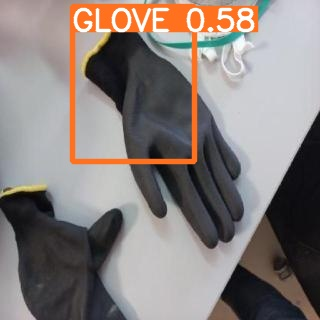

In [ ]:
Image(filename='/content/runs/detect/predict6/20220721_162553_jpg.rf.b142100750220a4b3976ca3dfacaac28.jpg', width=400)

## demo video

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source='/content/demo.mp4'

2025-01-10 15:15:08.171425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 15:15:08.190980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 15:15:08.196830: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 15:15:08.211238: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 15:15:09.402865: W tensorflow/comp

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict7/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)